<a href="https://colab.research.google.com/github/sauravsolanki/IdentifyTheSnakeBreed/blob/main/IdentifySnakeColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Identify the snake breed
Max. score: 100
#### Problem statement
The government has been facing a long-standing issue of wild animals entering residential areas due to various reasons. It's of critical importance that if any such dangerous animal is encountered, the concerned authority should be notified immediately. Reptiles, especially snakes, are among the most dangerous animals and they often enter residential areas. 

Recently due to an incident of a youngster getting bitten by a snake, the government decided to install cameras at every corner of the road to detect snakes and other animals.

You have been hired as a Deep Learning engineer to create a sophisticated model that can detect the breed of a snake from its image.

#### Data description
This data set consists of the following two columns:

#### Column Name	Description
image_id	Name of the image file
breed	Snake breed [35 different breeds]
The data folder consists of two folders and two .csv files. The details are as follows:

train: Contains 5508 images for 35 classes 
test: Contains 2361 images
train.csv: 5508 x 2
test.csv: 2361 x 1
Submission format
You are required to write your predictions in a .csv file and upload it by clicking the Upload File button.

#### Sample submission

image_id,breed
a8b3ad1dde,nerodia-erythrogaster
8b492b973d,pantherophis-vulpinus
929b99ea92,thamnophis-sirtalis
bbac7385e2,pantherophis-obsoletus
ef776b1488,agkistrodon-contortrix
Evaluation metric

####  Note: To avoid any discrepancies in the scoring, ensure that all the index column (image_id) values in the submitted file match the values in the provided test.csv file.

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# 0 = all messages are logged (default behavior)
# 1 = INFO messages are not printed
# 2 = INFO and WARNING messages are not printed
# 3 = INFO, WARNING, and ERROR messages are not printed

In [ ]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)  # or any {DEBUG, INFO, WARN, ERROR, FATAL}

# google colab
from google.colab import files,drive
# mounting google drive
drive.mount("/drive",force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly&response_type=code

Enter your authorization code:
4/1AY0e-g6VeqKJVbsnivhwbYQdtd-P50RoxZP6FeL9jC_GAuTnsCrn7Lti-SE


In [ ]:
# please make sure your are using hardware properly
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 728753618297772233
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 2357731314516530455
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 642796568674749520
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 13816878848
locality {
  bus_id: 1
  links {
  }
}
incarnation: 768031544484938980
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [ ]:
root = "/drive/MyDrive/data/HackerEarth/SnakeBreed/"

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
import datetime
# for tensorboard
log_dir = root + "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [ ]:
# bash sciprt to kill any tensorboard instances
# !ps -ef | grep "/home/saurav/anaconda3/envs/datascience/bin/tensorboard --logdir logs/fit" | 

# tensorboard customisation to sort the logs in time

In [ ]:
%tensorboard --logdir "/drive/MyDrive/data/HackerEarth/SnakeBreed/logs"

<IPython.core.display.Javascript object>

Custom Callbacks

In [ ]:
import time
class CustomCallback(tf.keras.callbacks.Callback):
  def on_train_begin(self, logs=None):
    print("Preparing for catching best Model .......")
    self.best_val = 10000000
    self.best_model_name = "best_model"

  def on_epoch_end(self, epoch, logs=None):
    # keys = list(logs.keys())
    # print("End epoch {} of training; got log keys: {}".format(epoch, keys))
    if logs["val_accuracy"] < self.best_val:
      print("\n@Epoch=%d: Saving Model .... "%(epoch))
      self.best_val = logs["val_accuracy"]
      self.model.save(root +'models/best_model.h5')


Dataset

In [ ]:
data_dir = root + "/tfData/train"
batch_size = 16
img_height = 224
img_width= 224
num_classes = 35

# finetuning
# Create the base model from the pre-trained model MobileNet V2

IMG_SIZE = (img_width, img_height)


train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=IMG_SIZE,
  batch_size=batch_size)


val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=IMG_SIZE,
  batch_size=batch_size)


Found 5508 files belonging to 35 classes.
Using 4407 files for training.
Found 5508 files belonging to 35 classes.
Using 1101 files for validation.


model

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input


In [ ]:

IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

image_batch, label_batch = next(iter(train_ds))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

9412608/9406464 [==============================] - 0s 0us/step
(16, 7, 7, 1280)


In [ ]:
base_model.trainable = False
base_model.summary()


Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(16, 1280)


In [ ]:
prediction_layer = tf.keras.layers.Dense(num_classes)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(16, 35)


In [ ]:
inputs = tf.keras.Input(shape=(img_width, img_height, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 224, 224, 3)       0         
_________________________________________________________________
tf_op_layer_RealDiv (TensorF [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf_op_layer_Sub (TensorFlowO [(None, 224, 224, 3)]     0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)             

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
# model = tf.keras.models.load_model(root +'models/best_model.h5')

In [ ]:
epochs=50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[tensorboard_callback, CustomCallback()])

Preparing for catching best Model .......
Epoch 1/50
276/276 [==============================] - ETA: 0s - loss: 3.7111 - accuracy: 0.0713
@Epoch=0: Saving Model .... 
276/276 [==============================] - 2553s 9s/step - loss: 3.7111 - accuracy: 0.0713 - val_loss: 3.4090 - val_accuracy: 0.1017
Epoch 2/50
276/276 [==============================] - 36s 129ms/step - loss: 3.4157 - accuracy: 0.1221 - val_loss: 3.2261 - val_accuracy: 0.1535
Epoch 3/50
276/276 [==============================] - 37s 132ms/step - loss: 3.2534 - accuracy: 0.1520 - val_loss: 3.0975 - val_accuracy: 0.1753
Epoch 4/50
276/276 [==============================] - 37s 134ms/step - loss: 3.1129 - accuracy: 0.1656 - val_loss: 3.0029 - val_accuracy: 0.1971
Epoch 5/50
276/276 [==============================] - 36s 131ms/step - loss: 2.9905 - accuracy: 0.2033 - val_loss: 2.9297 - val_accuracy: 0.2071
Epoch 6/50
276/276 [==============================] - 36s 130ms/step - loss: 2.9080 - accuracy: 0.2183 - val_loss: 2.870

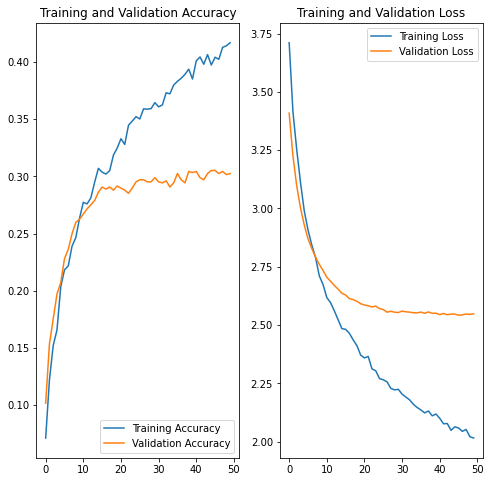

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

submission

In [ ]:
# load the best model and evaluate
best_model = tf.keras.models.load_model(root +'models/best_model.h5')
print(best_model.evaluate_generator(val_ds))
print(model.evaluate_generator(val_ds))

[3.409022092819214, 0.011807448230683804]
[2.5477941036224365, 0.30245232582092285]


In [ ]:
import pathlib
import PIL

img_paths = root + "tfData/test"
data_dir = pathlib.Path(img_paths)
roses = list(data_dir.glob('*.jpg'))

LABELS = train_ds.class_names
print(len(roses))

# submission
submission_data = []

for img_index in range(len(roses)):    
    # load the image from path
    image = tf.keras.preprocessing.image.load_img(str(roses[img_index]))
    
    # to numpy array
    input_arr = tf.keras.preprocessing.image.img_to_array(image)

    # resize into IMG_SIZE
    # print(input_arr.shape)
    # input_arr.resize(IMG_SHAPE)
    # print(input_arr.shape)

    # adding a dimension
    input_arr = np.array([input_arr])  # Convert single image to a batch.
    
    # model predictions
    predictions = model.predict(input_arr)
    # print(np.argmax(predictions[0]))
    # print(LABELS[np.argmax(predictions[0])])
    # print("-----")
    
    # find the class names
    label = LABELS[np.argmax(predictions)]
    
    # find the image_id
    image_id = str(roses[img_index]).split("/")[-1].split(".")[0]

    # add to prediction result
    submission_data.append([image_id,label])
    # if (img_index +1) %100 ==0:
    #   break
else:
    print("Done. Saving in dataframe for Submission")
    submission_data = pd.DataFrame(data=submission_data,columns=["image_id","breed"],index=None)
    print(submission_data.head())

2361
Done. Saving in dataframe for Submission
     image_id             breed
0  a869568b74    crotalus-atrox
1  b70ed6998c   storeria-dekayi
2  2c983824a0    crotalus-atrox
3  630628b60b  crotalus-viridis
4  9270b2e18c    crotalus-atrox


In [ ]:
import time

if not os.path.exists(root + "./submission"):
    os.mkdir(root + "/submission")
save_submission_path = root + "./submission/%s.csv"%(time.ctime())
submission_data.to_csv(save_submission_path,index=False)

files.download(save_submission_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Conclusion

tfa.losses.SigmoidFocalCrossEntropy(
    from_logits: bool = False,
    alpha: tfa.image.filters.FloatTensorLike = 0.25,
    gamma: tfa.image.filters.FloatTensorLike = 2.0,
    reduction: str = tf.keras.losses.Reduction.NONE,
    name: str = 'sigmoid_focal_crossentropy'
)

In [ ]:
import tensorflow_addons as tfa

fl = tfa.losses.SigmoidFocalCrossEntropy()
loss = fl(
  y_true = [[1.0], [1.0], [0.0]],
  y_pred = [[0.97], [0.91], [0.03]])
print('Loss: ', loss.numpy()) 
#  # Loss: [6.8532745e-06,
#                                         1.9097870e-04,
#                                         2.0559824e-05]

Loss:  [6.8532745e-06 1.9097870e-04 2.0559824e-05]


In [ ]:
loss = fl(
  y_true = [[0.810, 0.36, 0.32]],
  y_pred = [[10.0]])
print('Loss: ', loss.numpy()) 

Loss:  [179.5846]


In [ ]:
FL(pt) = −(1 − pt)**γ *log(pt)

In [ ]:
import numpy as np

-((1-0.97)**2) * (np.log(0.97))

2.7413286736237764e-05

In [ ]:
-((1-0.97)**1) * (np.log(0.97))

0.000913776224541258

In [ ]:
-((1-0.97)**0.25) * (np.log(0.97))

0.012676486929240286